## File to explore the provide datasets for trends and patterns


In [4]:
#std libs
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yaml

#custom mods


In [3]:
#read in json meta data
with open("datasets/meta_2017.json", "r") as json_file_2017:
    json_data_2017 = json.load(json_file_2017)

with open("datasets/meta_2014.json", "r") as json_file_2014:
    json_data_2014 = json.load(json_file_2014)



In [23]:
#normalize meta data
plaid_meta_2014_df=pd.json_normalize(json_data_2014)
plaid_meta_2017_df=pd.json_normalize(json_data_2017)

#combine dataframes
plaid_meta_df=pd.concat([plaid_meta_2014_df,plaid_meta_2017_df])
plaid_meta_df
#plaid_meta_df.to_csv("plaid_meta.csv")

,id,meta.appliance.brand,meta.appliance.current,meta.appliance.load,meta.appliance.manufacture_year,meta.appliance.model_number,meta.appliance.notes,meta.appliance.status,meta.appliance.type,meta.appliance.voltage,meta.appliance.wattage,meta.header.collection_time,meta.header.notes,meta.header.sampling_frequency,meta.instances.length,meta.location
0,1,,,NL,,,,off-on,Compact Fluorescent Lamp,,,"July, 2013","some instances are not well calibrated, meta d...",30000Hz,2.00s,house1
1,2,,,NL,,,,off-on,Compact Fluorescent Lamp,,,"July, 2013","some instances are not well calibrated, meta d...",30000Hz,2.00s,house1
2,3,,,NL,,,,off-on,Compact Fluorescent Lamp,,,"July, 2013","some instances are not well calibrated, meta d...",30000Hz,2.00s,house1
3,4,,,NL,,,,off-on,Compact Fluorescent Lamp,,,"July, 2013","some instances are not well calibrated, meta d...",30000Hz,2.00s,house1
4,5,,,NL,,,,off-on,Compact Fluorescent Lamp,,,"July, 2013","some instances are not well calibrated, meta d...",30000Hz,2.00s,house1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,1789,Whirlpool,,NL,,Roper,,off-on,Washing Machine,,,"December, 2014","all instances are well calibrated, abounded m...",30000Hz,2.93s,house9
715,1790,Whirlpool,,NL,,Roper,,off-on,Washing Machine,,,"December, 2014","all instances are well calibrated, abounded m...",30000Hz,2.92s,house9
716,1791,Whirlpool,,NL,,Roper,,off-on,Washing Machine,,,"December, 2014","all instances are well calibrated, abounded m...",30000Hz,2.92s,house9
717,1792,Whirlpool,,NL,,Roper,,off-on,Washing Machine,,,"December, 2014","all instances are well calibrated, abounded m...",30000Hz,2.88s,house9


### CSV dataset tests



In [41]:
test_data = pd.read_csv('datasets/PLAID2017/6.csv')
test_data.columns= ['Voltage', 'Current']
test_data["Power"] = test_data['Voltage']*test_data['Current']
test_data


,Voltage,Current,Power
0,-0.95,-133.400,126.73000
1,-0.95,-134.280,127.56600
2,-0.94,-135.030,126.92820
3,-0.94,-135.800,127.65200
4,-0.95,-136.740,129.90300
...,...,...,...
299994,-0.41,-19.207,7.87487
299995,-0.45,-21.205,9.54225
299996,-0.47,-23.358,10.97826
299997,-0.50,-25.293,12.64650


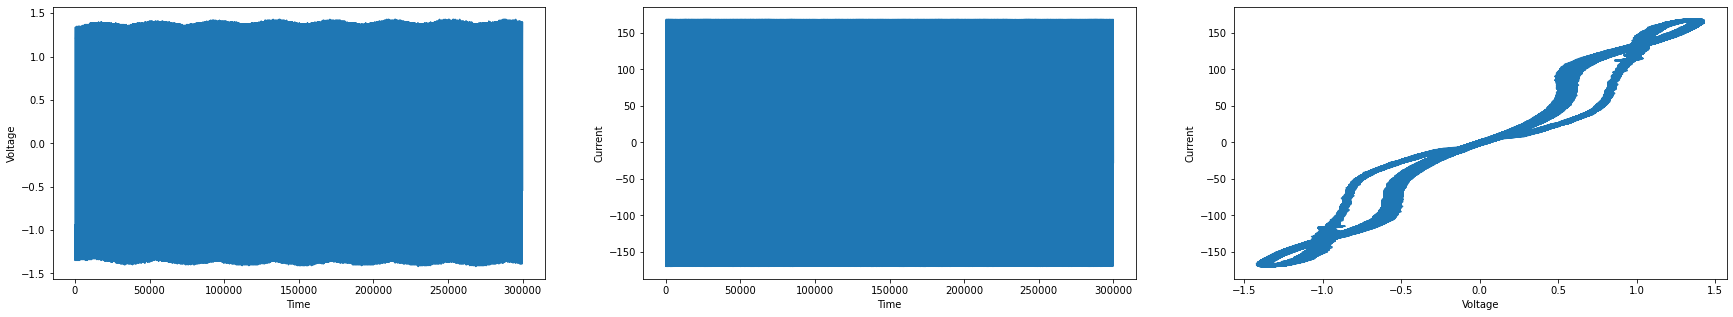

In [42]:
# display on plt
voltage = np.array(test_data['Voltage'])
current = np.array(test_data['Current'])
power = np.array(test_data['Power'])
time = test_data.index

# create subplots for data
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (30,5))

ax1.plot(voltage)
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage')

ax2.plot(current)
ax2.set_xlabel('Time')
ax2.set_ylabel('Current')


ax3.plot(voltage,current)
ax3.set_xlabel('Voltage')
ax3.set_ylabel('Current')

plt.show()

### Plot VI trajectory tests

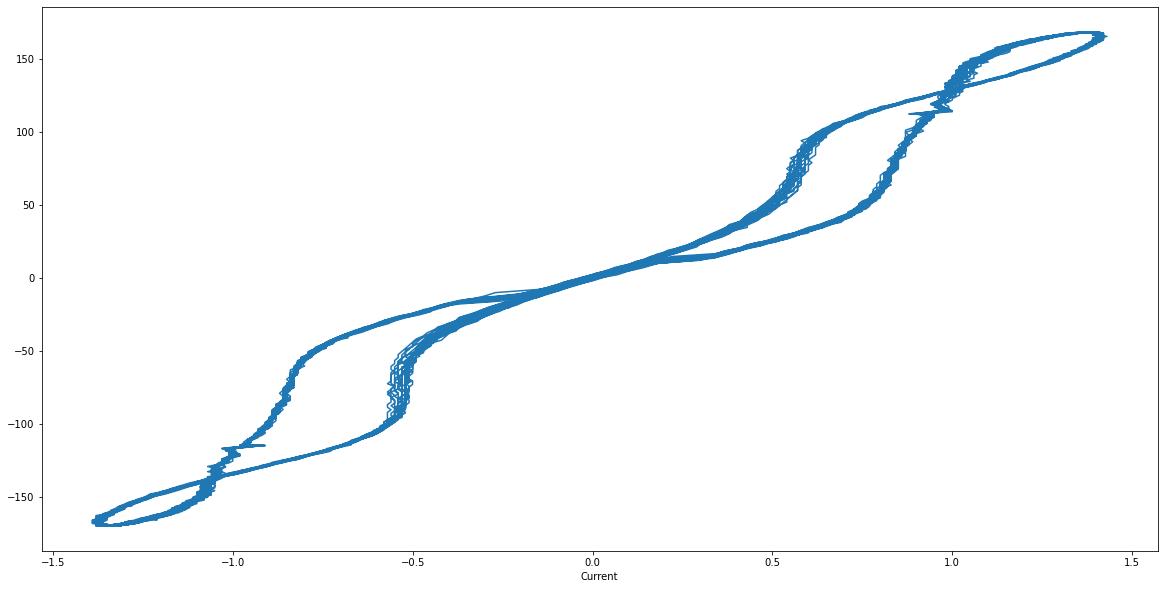

In [43]:
fig = plt.figure(figsize=(20,10))

plt.plot(voltage[-10000:],current[-10000:])

plt.xlabel('Voltage')
plt.xlabel('Current')

plt.show()

In [39]:
fig =px.scatter(x=voltage[-10000:],y=current[-10000:])
fig.show()

In [16]:
voltage

array([-0.24, -0.21, -0.19, ..., -0.69, -0.7 , -0.67])

In [17]:
current

array([-164.57, -165.1 , -165.66, ..., -157.07, -157.79, -158.63])

## Plot Power Consumption


In [44]:
fig = px.line(power[-10000:])
fig.show()

In [15]:
power[:100]

array([ 39.4968 ,  34.671  ,  31.4754 ,  29.8872 ,  26.6256 ,  25.008  ,
        21.7269 ,  20.0928 ,  21.8114 ,  30.2508 ,  60.5484 ,  62.2969 ,
        50.586  ,  38.8332 ,  30.4074 ,  21.9817 ,  18.6164 ,  16.921  ,
        16.937  ,  25.41   ,  32.2221 ,  59.311  ,  62.678  ,  59.332  ,
        50.868  ,  45.7974 ,  39.0195 ,  37.3098 ,  37.323  ,  35.6076 ,
        35.5866 ,  35.5866 ,  37.2614 ,  35.5488 ,  25.3395 ,  28.7181 ,
        26.9744 ,  26.9344 ,  23.5158 ,  18.4492 ,  15.0642 ,  10.0218 ,
        -1.6619 ,  -8.277  , -11.5444 , -13.1312 , -17.9696 , -21.1432 ,
       -21.0743 , -19.3752 , -19.2564 , -20.7389 , -20.6089 , -20.4919 ,
       -20.3424 , -21.7322 , -21.5586 , -19.8653 , -19.6781 , -20.9832 ,
       -19.2907 , -19.0957 , -18.8929 , -18.6836 , -18.4886 , -19.6798 ,
       -19.4404 , -17.8529 , -18.9868 , -17.4122 , -17.2016 , -16.991  ,
       -16.7856 , -16.5711 , -16.3683 , -14.9112 , -14.7276 , -15.7612 ,
       -15.5675 , -15.3608 , -15.1619 , -14.9721 , 

### Testing of aggregated loads

In [49]:
# lamp + fridge
lamp_data = pd.read_csv('datasets/PLAID2017/1.csv')
fridge_data = pd.read_csv('datasets/PLAID2017/1.csv')
lamp_data.columns= ['Voltage', 'Current']
fridge_data.columns= ['Voltage', 'Current']
lamp_data["Power"]= lamp_data['Voltage']*lamp_data['Current']
fridge_data["Power"]= fridge_data['Voltage']*fridge_data['Current']
print(f"lamp dataset size {lamp_data.size}")
print(f"fridge dataset size {fridge_data.size}")


lamp dataset size 179997
fridge dataset size 179997


In [52]:
aggregate_df=pd.DataFrame()
aggregate_df["Power"]=lamp_data['Power']+fridge_data['Power']
aggregate_df.tail(100)

,Power
59899,0.374910
59900,0.611500
59901,0.671064
59902,1.062900
59903,1.280900
...,...
59994,216.930000
59995,221.491600
59996,216.756600
59997,220.906000


In [53]:
fig = px.line(aggregate_df["Power"].tail(10000))
fig.show()

## UK-DALE EDA

In [13]:
# read in dat file
test_df = pd.read_table('datasets/ukdale/house_1/channel_1.dat',delimiter='\s+')
test_df.columns=['time','pow_W']
test_df

,time,pow_W
0,1352500101,582
1,1352500107,600
2,1352500113,586
3,1352500120,596
4,1352500132,581
...,...,...
21837630,1493227935,667
21837631,1493227942,667
21837632,1493227948,686
21837633,1493227954,667


In [16]:
# plot timer series of aggregate
fig = px.line(test_df['pow_W'][-10000:])
fig.show()